<a href="https://colab.research.google.com/github/GeraDLC/COVID19_Analysis/blob/main/COVID19_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROYECTO COVID 19**


---

***Autor: Gerardo de la Cruz C.***

Una entidad gubernamental responsable de la gestión de la salud en un país enfrenta el desafío de comprender y analizar la propagación del COVID-19 para tomar decisiones informadas y eficaces en la gestión de la pandemia. Como Científico de Datos, la tarea es analizar los datos relacionados con el COVID-19 y presentar insights a través de visualizaciones que respondan a las siguientes preguntas claves:

### **Preguntas**

**1. ¿Cómo ha evolucionado el COVID-19 en el país en comparación con el impacto observado a nivel mundial?**

**2. ¿Cuál ha sido la evolución de los nuevos casos diarios reportados de COVID-19 en el país a lo largo del tiempo?**

**3. ¿Cuál es la evolución del índice de letalidad del COVID-19 en el país, comparado con los países con los índices históricos más elevados?**

**4. Desde una perspectiva demográfica, ¿cuáles son las características que tienen un mayor impacto en el índice de letalidad en un país?**

**5. ¿Existe otro insight para proporcionar?**

##**1. CONFIGURACIÓN DEL AMBIENTE**

In [ ]:
#Librerías a utiizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import seaborn as sns
from io import StringIO
import requests
from sklearn.ensemble import RandomForestRegressor

##**2. OBTENCIÓN, TRATAMIENTO Y EDA**

In [ ]:
#Recolección de Datos
df_covid = pd.read_csv(StringIO(requests.get("https://covid19.who.int/WHO-COVID-19-global-data.csv").text))
df_population = pd.read_excel('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1.xlsx', sheet_name=0, skiprows=16)
df_population = df_population[df_population['Year'] == 2019]

##Covid

In [ ]:
#Echemos un vistazo
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50880 entries, 0 to 50879
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      50880 non-null  object 
 1   Country_code       49396 non-null  object 
 2   Country            49608 non-null  object 
 3   WHO_region         45792 non-null  object 
 4   New_cases          36622 non-null  float64
 5   Cumulative_cases   50880 non-null  int64  
 6   New_deaths         24216 non-null  float64
 7   Cumulative_deaths  50880 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.1+ MB


In [ ]:
df_covid.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,EMRO,NaN,0,NaN,0


In [ ]:
df_covid.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,3.662200e+04,5.088000e+04,24216.000000,5.088000e+04
mean,2.114490e+04,1.595994e+06,289.905434,1.873122e+04
std,2.794888e+05,7.172653e+06,1232.474473,7.800245e+04
min,-6.507900e+04,0.000000e+00,-3432.000000,0.000000e+00
25%,5.200000e+01,2.750000e+03,4.000000,2.100000e+01
50%,4.700000e+02,3.813600e+04,21.000000,4.115000e+02
75%,4.477750e+03,4.670500e+05,110.000000,6.066250e+03
max,4.047548e+07,1.034368e+08,47687.000000,1.165780e+06


In [ ]:
#Verificando nulos
df_covid.isna().sum()

Date_reported            0
Country_code          1484
Country               1272
WHO_region            5088
New_cases            14258
Cumulative_cases         0
New_deaths           26664
Cumulative_deaths        0
dtype: int64

In [ ]:
#Eliminar elementos nulos de la columna Country_code
df_covid.dropna(subset=['Country_code'], inplace=True)

In [ ]:
df_covid.isna().sum()

Date_reported            0
Country_code             0
Country                  0
WHO_region            3816
New_cases            12960
Cumulative_cases         0
New_deaths           25308
Cumulative_deaths        0
dtype: int64

In [ ]:
#Eiminar las columnas que no queremos
df_covid.drop('WHO_region', axis=1, inplace=True)

In [ ]:
#Sustituir los nulos con cero
df_covid.fillna(0, inplace=True)

In [ ]:
df_covid.isna().sum()

Date_reported        0
Country_code         0
Country              0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64

In [ ]:
#Cambiar el formato actual de la columna Date_reported para un formato de tipo datetime64[ns].
df_covid['Date_reported'] = pd.to_datetime(df_covid['Date_reported'])

In [ ]:
df_covid.head()

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,0.0,0,0.0,0
1,2020-01-12,AF,Afghanistan,0.0,0,0.0,0
2,2020-01-19,AF,Afghanistan,0.0,0,0.0,0
3,2020-01-26,AF,Afghanistan,0.0,0,0.0,0
4,2020-02-02,AF,Afghanistan,0.0,0,0.0,0


In [ ]:
#Substituir el formato actual de las columnas ['New_cases', 'New_deaths']para un formato de tipo int64.
df_covid['New_cases'] = df_covid['New_cases'].astype('int64')
df_covid['New_deaths'] = df_covid['New_deaths'].astype('int64')

#Crear una nueva columna 'lethality_rate' con la siguiente fórmula: 'Cumulative_deaths'/'Cumulative_cases'*100
df_covid['lethality_rate'] = (df_covid['Cumulative_deaths']/(df_covid['Cumulative_cases']) * 100)

In [ ]:
df_covid['lethality_rate'].describe()

count    4.530700e+04
mean              inf
std               NaN
min      0.000000e+00
25%      5.128205e-01
50%      1.181060e+00
75%      2.160936e+00
max               inf
Name: lethality_rate, dtype: float64

<Axes: >

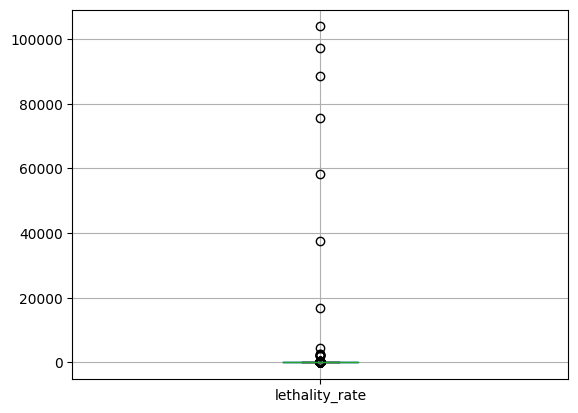

In [ ]:
#Boxplot
df_covid.boxplot(column=['lethality_rate'])

Se tienen demasiados outliers.

In [ ]:
# Con el fin de eliminar outliers, nos quedaremos con los registros cuyo valor en la columna lethality_rate se encuentre entre los cuantiles 0 a 0.99
quantile_0 = df_covid['lethality_rate'].quantile(0.00)
quantile_99 = df_covid['lethality_rate'].quantile(0.99)

# Filtrar el DataFrame para incluir solo registros dentro del rango de cuantiles
df_covid_filtered = df_covid[(df_covid['lethality_rate'] >= quantile_0) & (df_covid['lethality_rate'] <= quantile_99)]

In [ ]:
df_covid_filtered['lethality_rate'].describe()

count    44853.000000
mean         1.595293
std          1.666892
min          0.000000
25%          0.504360
50%          1.164988
75%          2.126546
max         12.776413
Name: lethality_rate, dtype: float64

<Axes: >

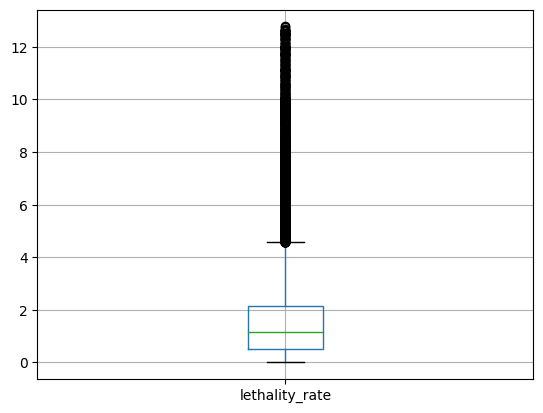

In [ ]:
df_covid_filtered.boxplot(column=['lethality_rate'])

In [ ]:
df_covid_filtered.head()

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
8,2020-03-01,AF,Afghanistan,1,1,0,0,0.000000
9,2020-03-08,AF,Afghanistan,0,1,0,0,0.000000
10,2020-03-15,AF,Afghanistan,6,7,0,0,0.000000
11,2020-03-22,AF,Afghanistan,17,24,0,0,0.000000
12,2020-03-29,AF,Afghanistan,67,91,2,2,2.197802


In [ ]:
#Resetear indices
df_covid_limpio = df_covid_filtered.reset_index(drop=True)

In [ ]:
df_covid_limpio.head()

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
0,2020-03-01,AF,Afghanistan,1,1,0,0,0.000000
1,2020-03-08,AF,Afghanistan,0,1,0,0,0.000000
2,2020-03-15,AF,Afghanistan,6,7,0,0,0.000000
3,2020-03-22,AF,Afghanistan,17,24,0,0,0.000000
4,2020-03-29,AF,Afghanistan,67,91,2,2,2.197802


In [ ]:
#Info del df final
df_covid_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44853 entries, 0 to 44852
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      44853 non-null  datetime64[ns]
 1   Country_code       44853 non-null  object        
 2   Country            44853 non-null  object        
 3   New_cases          44853 non-null  int64         
 4   Cumulative_cases   44853 non-null  int64         
 5   New_deaths         44853 non-null  int64         
 6   Cumulative_deaths  44853 non-null  int64         
 7   lethality_rate     44853 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 2.7+ MB


In [ ]:
df_covid_limpio.describe() #no es muy factible que haya negativos en nuevos casos y en nuevas muertes

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
count,4.485300e+04,4.485300e+04,44853.000000,4.485300e+04,44853.000000
mean,1.722128e+04,1.809406e+06,151.147125,2.114609e+04,1.595293
std,2.526782e+05,7.614161e+06,905.888414,8.276044e+04,1.666892
min,-6.507900e+04,1.000000e+00,-3432.000000,0.000000e+00,0.000000
25%,5.000000e+00,8.173000e+03,0.000000,7.300000e+01,0.504360
50%,1.720000e+02,6.399300e+04,1.000000,8.030000e+02,1.164988
75%,2.624000e+03,6.263340e+05,26.000000,7.975000e+03,2.126546
max,4.047548e+07,1.034368e+08,47687.000000,1.165780e+06,12.776413


##Population

In [ ]:
#Echando un vistazo
df_population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 69 to 20593
Data columns (total 65 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Index                                                                                           286 non-null    int64  
 1   Variant                                                                                         286 non-null    object 
 2   Region, subregion, country or area *                                                            286 non-null    object 
 3   Notes                                                                                           76 non-null     object 
 4   Location code                                                                                   286 non-null    int64  
 5   ISO3 Alpha-c

In [ ]:
#Seleccionando columnas de interés
df_population2 = df_population[['ISO2 Alpha-code',
                                      'Total Population, as of 1 July (thousands)',
                                      'Male Population, as of 1 July (thousands)',
                                      'Female Population, as of 1 July (thousands)',
                                      'Population Density, as of 1 July (persons per square km)',
                                      'Life Expectancy at Birth, both sexes (years)']].copy()
df_population2.head()

,ISO2 Alpha-code,"Total Population, as of 1 July (thousands)","Male Population, as of 1 July (thousands)","Female Population, as of 1 July (thousands)","Population Density, as of 1 July (persons per square km)","Life Expectancy at Birth, both sexes (years)"
69,NaN,7764951.032,3906407.855,3858543.178,59.546,72.79
142,NaN,1080677.346,538158.386,542518.959,49.425,60.725
214,NaN,530149.56,273104.233,257045.327,42.485,73.392
286,NaN,2021559.651,1033583.865,987975.786,195.683,70.615
358,NaN,2324282.002,1176368.32,1147913.681,143.117,77.013


In [ ]:
# Renombrar las columnas con nombres más sencillos
df_population2 = df_population2.rename(columns={
    'ISO2 Alpha-code': 'Country_code',
    'Total Population, as of 1 July (thousands)': 'Total_Population',
    'Male Population, as of 1 July (thousands)': 'Male_Population',
    'Female Population, as of 1 July (thousands)': 'Female_Population',
    'Population Density, as of 1 July (persons per square km)': 'Population_Density',
    'Life Expectancy at Birth, both sexes (years)': 'Life_Expectancy'
})

In [ ]:
df_population2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 69 to 20593
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country_code        236 non-null    object
 1   Total_Population    286 non-null    object
 2   Male_Population     286 non-null    object
 3   Female_Population   286 non-null    object
 4   Population_Density  286 non-null    object
 5   Life_Expectancy     286 non-null    object
dtypes: object(6)
memory usage: 15.6+ KB


In [ ]:
#Checar nulos
df_population2.isnull().sum()

Country_code          50
Total_Population       0
Male_Population        0
Female_Population      0
Population_Density     0
Life_Expectancy        0
dtype: int64

In [ ]:
# Eliminar todos los registros nulos en el DataFrame
df_population2 = df_population2.dropna()

In [ ]:
#Checar nulos
df_population2.isnull().sum()

Country_code          0
Total_Population      0
Male_Population       0
Female_Population     0
Population_Density    0
Life_Expectancy       0
dtype: int64

In [ ]:
# Convertir las columnas al formato int64
columnas_a_convertir = ['Total_Population', 'Male_Population', 'Female_Population', 'Population_Density', 'Life_Expectancy']

# Utilizar to_numeric con errors='coerce' para manejar valores no numéricos
df_population2[columnas_a_convertir] = df_population2[columnas_a_convertir].apply(pd.to_numeric, errors='coerce', downcast='integer')

In [ ]:
# Multiplicar por 1000 y sobrescribir las columnas
columnas_a_multiplicar = ['Total_Population', 'Male_Population', 'Female_Population']
df_population2[columnas_a_multiplicar] *= 1000

In [ ]:
df_population2.isnull().sum()

Country_code          0
Total_Population      0
Male_Population       1
Female_Population     1
Population_Density    0
Life_Expectancy       1
dtype: int64

In [ ]:
#Eliminar nulos
df_population2.dropna(inplace=True)

In [ ]:
df_population2.isnull().sum()

Country_code          0
Total_Population      0
Male_Population       0
Female_Population     0
Population_Density    0
Life_Expectancy       0
dtype: int64

In [ ]:
df_population2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 1801 to 20593
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country_code        235 non-null    object 
 1   Total_Population    235 non-null    float64
 2   Male_Population     235 non-null    float64
 3   Female_Population   235 non-null    float64
 4   Population_Density  235 non-null    float64
 5   Life_Expectancy     235 non-null    float64
dtypes: float64(5), object(1)
memory usage: 12.9+ KB


In [ ]:
# Reiniciar el índice del DataFrame
df_population_limpio = df_population2.reset_index(drop=True)

In [ ]:
df_population_limpio.head()

,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
0,BI,11874838.0,5894278.0,5980560.0,457.605,62.351
1,KM,790986.0,397126.0,393860.0,425.033,64.068
2,DJ,1073994.0,533626.0,540367.0,46.333,63.085
3,ER,3498818.0,1724860.0,1773958.0,28.881,67.300
4,ET,114120594.0,57375433.0,56745161.0,114.121,65.838


In [ ]:
df_population_limpio.describe()

,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
count,2.350000e+02,2.350000e+02,2.350000e+02,235.000000,235.000000
mean,3.303193e+07,1.661798e+07,1.641395e+07,459.047102,73.489502
std,1.344877e+08,6.889130e+07,6.560933e+07,2222.151677,7.360874
min,1.752000e+03,8.790000e+02,8.740000e+02,0.136000,52.910000
25%,4.000210e+05,1.948405e+05,2.109970e+05,38.731000,68.524500
50%,5.453924e+06,2.738222e+06,2.767844e+06,95.237000,75.057000
75%,2.075953e+07,1.040942e+07,1.035011e+07,239.942000,79.100500
max,1.421864e+09,7.267819e+08,6.950821e+08,24855.034000,86.542000


##**PREGUNTA 1**

**¿Cómo ha evolucionado el COVID-19 en el país (Alemania) en comparación con el impacto observado a nivel mundial?**

In [ ]:
df_covid_limpio.head()

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
0,2020-03-01,AF,Afghanistan,1,1,0,0,0.000000
1,2020-03-08,AF,Afghanistan,0,1,0,0,0.000000
2,2020-03-15,AF,Afghanistan,6,7,0,0,0.000000
3,2020-03-22,AF,Afghanistan,17,24,0,0,0.000000
4,2020-03-29,AF,Afghanistan,67,91,2,2,2.197802


In [ ]:
# Crear un diccionario de mapeo de nombres de países a cambiar y cambiarlos a español (esto en base a los resultados que ya se obtuvieron)
nombres_a_cambiar = {'United States of America':'EUA',
                     'United Kingdom of Great Britain and Northern Ireland':'Reino Unido',
                     'France': 'Francia', 'Germany': 'Alemania', 'Brazil':'Brasil', 'Republic of Korea':'Corea del Sur',
                     'Japan':'Japón', 'Italy':'Italia', 'Mexico':'México', 'Russian Federation':'Rusia', 'Peru':'Perú'}

# Reemplazar los nombres de países en la columna 'Country'
df_covid_limpio['Country'] = df_covid_limpio['Country'].replace(nombres_a_cambiar)

In [ ]:
#Agrupar por país y obtener el máximo valor de la columna Cumulative_cases y ordenar
total_por_pais = df_covid_limpio.groupby('Country')['Cumulative_cases'].max().sort_values(ascending=False)

#Top 10
top_10_paises = total_por_pais.nlargest(10)

#Otros
otros = total_por_pais.drop(top_10_paises.index).sum()

top_10_paises['Otros'] = otros
top_10_paises

Country
EUA              103436829
China             99326423
India             45023751
Francia           38997490
Alemania          38437756
Brasil            37519960
Corea del Sur     34571873
Japón             33803572
Italia            26693706
Reino Unido       24885790
Otros            291519855
Name: Cumulative_cases, dtype: int64

In [ ]:
#Progresión de casos por país
total_por_pais = df_covid_limpio.groupby('Country')['Cumulative_cases'].max().sort_values(ascending=False)
top_5_paises = total_por_pais.nlargest(5)
df_covid_limpio_reset = df_covid_limpio.reset_index()
df_top_5 = df_covid_limpio_reset[df_covid_limpio_reset['Country'].isin(top_5_paises.index)]
total_acumulado_top_5 = df_top_5.pivot(index='Country', columns='Date_reported', values='Cumulative_cases').fillna(0)
total_acumulado_top_5

Date_reported,2020-01-05,2020-01-12,2020-01-19,2020-01-26,2020-02-02,2020-02-09,2020-02-16,2020-02-23,2020-03-01,2020-03-08,...,2023-11-19,2023-11-26,2023-12-03,2023-12-10,2023-12-17,2023-12-24,2023-12-31,2024-01-07,2024-01-14,2024-01-21
Country,,,,,,,,,,,,,,,,,,,,,
Alemania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170.0,1075.0,...,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0
China,1.0,45.0,125.0,1985.0,14411.0,37251.0,68584.0,77042.0,79968.0,80859.0,...,99320035.0,99320425.0,99320845.0,99321242.0,99321637.0,99322142.0,99322727.0,99323756.0,99325108.0,99326423.0
EUA,0.0,0.0,0.0,7.0,9.0,20.0,24.0,40.0,73.0,464.0,...,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0
Francia,0.0,0.0,0.0,3.0,6.0,12.0,12.0,16.0,16.0,16.0,...,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0
India,0.0,0.0,0.0,0.0,2.0,7.0,7.0,7.0,7.0,39.0,...,45001575.0,45001764.0,45002179.0,45003055.0,45004816.0,45008620.0,45013172.0,45018134.0,45021758.0,45023751.0


In [ ]:
#Agrupar por país y obtener el máximo valor de la columna Cumulative_deaths y ordenar
total_por_pais2 = df_covid_limpio.groupby('Country')['Cumulative_deaths'].max().sort_values(ascending=False)

#Top 10
top_10_paises2 = total_por_pais2.nlargest(10)

#Otros
otros = total_por_pais2.drop(top_10_paises2.index).sum()

top_10_paises2['Otros'] = otros
top_10_paises2

Country
EUA            1165780
Brasil          702116
India           533434
Rusia           401773
México          334958
Reino Unido     232112
Perú            221583
Italia          195805
Alemania        174979
Francia         167985
Otros          2885813
Name: Cumulative_deaths, dtype: int64

In [ ]:
#Muertes por país
total_por_pais2 = df_covid_limpio.groupby('Country')['Cumulative_deaths'].max().sort_values(ascending=False)
top_5_paises2 = total_por_pais2.nlargest(5)
df_covid_limpio_reset2 = df_covid_limpio.reset_index()
df_top_5_2 = df_covid_limpio_reset2[df_covid_limpio_reset['Country'].isin(top_5_paises2.index)]
total_acumulado_top_5_2 = df_top_5_2.pivot(index='Country', columns='Date_reported', values='Cumulative_cases').fillna(0)
total_acumulado_top_5_2

Date_reported,2020-01-26,2020-02-02,2020-02-09,2020-02-16,2020-02-23,2020-03-01,2020-03-08,2020-03-15,2020-03-22,2020-03-29,...,2023-11-19,2023-11-26,2023-12-03,2023-12-10,2023-12-17,2023-12-24,2023-12-31,2024-01-07,2024-01-14,2024-01-21
Country,,,,,,,,,,,,,,,,,,,,,
Brasil,0.0,0.0,0.0,0.0,0.0,1.0,13.0,84.0,904.0,3417.0,...,37519960.0,37519960.0,37519960.0,37519960.0,37519960.0,37519960.0,37519960.0,37519960.0,37519960.0,37519960.0
EUA,7.0,9.0,20.0,24.0,40.0,73.0,464.0,3929.0,31415.0,126309.0,...,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0
India,0.0,2.0,7.0,7.0,7.0,7.0,39.0,107.0,360.0,979.0,...,45001575.0,45001764.0,45002179.0,45003055.0,45004816.0,45008620.0,45013172.0,45018134.0,45021758.0,45023751.0
México,0.0,0.0,0.0,0.0,1.0,6.0,51.0,234.0,903.0,2117.0,...,7702324.0,7702412.0,7702517.0,7702619.0,7702738.0,7702802.0,7702809.0,7702809.0,7702809.0,7702809.0
Rusia,0.0,2.0,2.0,2.0,2.0,2.0,7.0,34.0,306.0,1534.0,...,23232461.0,23309567.0,23404646.0,23511820.0,23608723.0,23687755.0,23746552.0,23772474.0,23773097.0,23773710.0


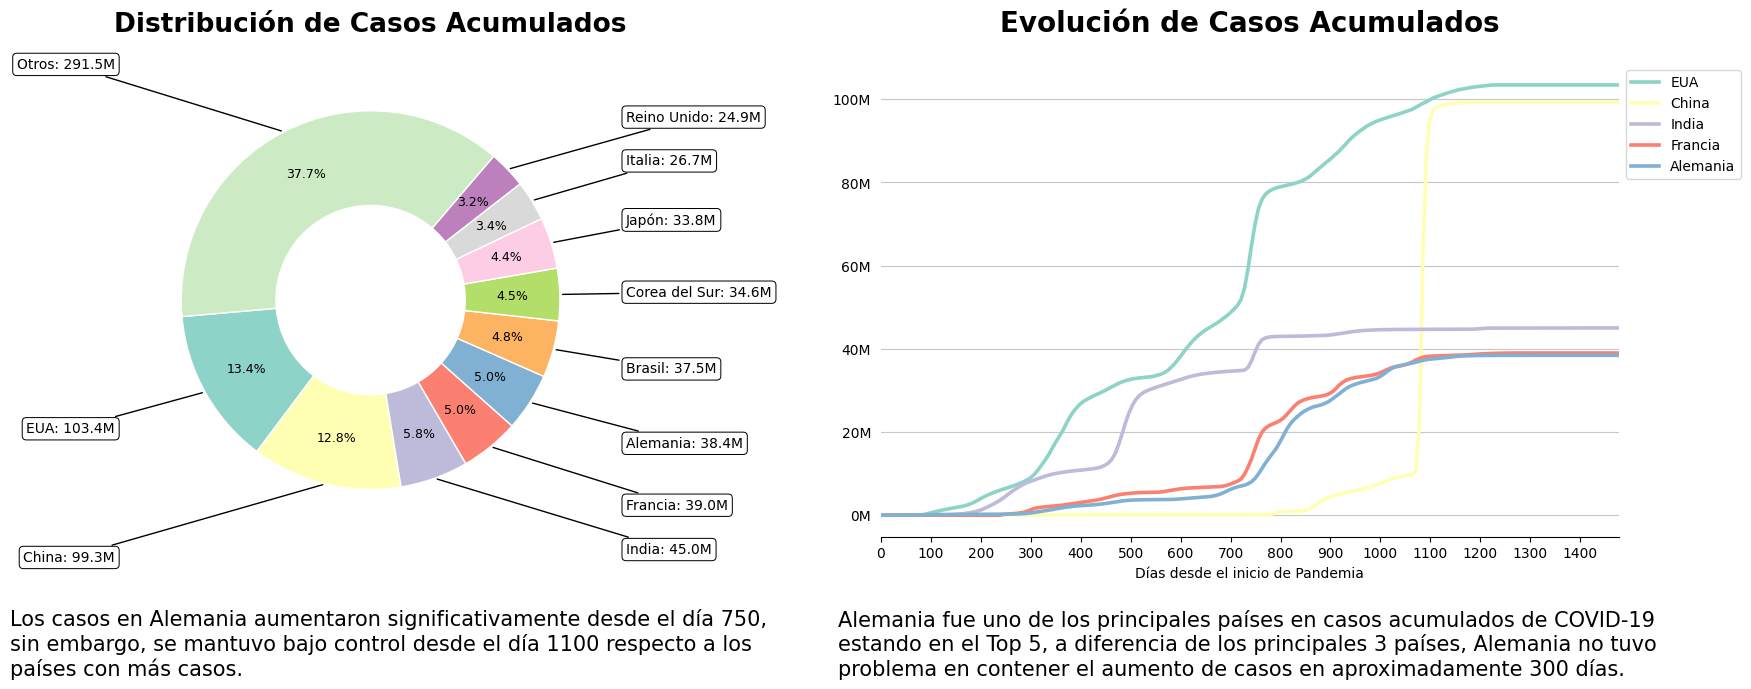

In [ ]:
#Gráfico de Donuts con Líneas de Conexión
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

#Paleta de colores
colors = plt.cm.Set3.colors[:len(top_10_paises)]

#Gráfico de Donuts
wedges, texts, autotexts = axs[0].pie(top_10_paises, autopct='%1.1f%%', textprops={'fontsize': 9}, pctdistance=0.75, startangle=185,
                                      wedgeprops=dict(width=0.5, edgecolor='w'), colors=colors)

#Leyenda
legend_labels = [f'Otros ({otros})'] + top_10_paises.index.tolist()
axs[0].set_title("Distribución de Casos Acumulados", fontweight='bold', fontsize=19, y=1.05)

#Conexiones entre porciones y etiquetas
for i, (wedg, autotext) in enumerate(zip(wedges, autotexts)):
    ang = (wedg.theta2 - wedg.theta1) / 2. + wedg.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw = dict(arrowprops=dict(arrowstyle="-"),
              bbox=dict(boxstyle="round,pad=0.3", fc="w", ec="k", lw=0.72),
              zorder=0, va="center")
    axs[0].annotate(f"{legend_labels[i+1]}: {top_10_paises.iloc[i]/1e6:,.1f}M", xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                   horizontalalignment=horizontalalignment, **kw)

#Gráfico de Líneas
days_since_start = (total_acumulado_top_5.columns - total_acumulado_top_5.columns[0]).days
colors_tab20 = plt.cm.Set3.colors
for i, pais in enumerate(top_5_paises.index):
    axs[1].plot(days_since_start, total_acumulado_top_5.loc[pais] / 1e6, label=pais, linewidth=2.6, color=colors_tab20[i])

#Personalización del gráfico de líneas
axs[1].set_xlabel("Días desde el inicio de Pandemia")
axs[1].legend(bbox_to_anchor=(1.0, 1.0), loc="upper left")
axs[1].set_title("Evolución de Casos Acumulados", fontweight='bold', fontsize=20, y=1.05)
axs[1].grid(axis='y', linestyle='-', alpha=0.7)
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)
axs[1].spines['left'].set_visible(False)
axs[1].yaxis.set_ticks_position('none')

#Ajustar el rango y los ticks del eje x
min_days = 0
max_days = days_since_start[-1]
axs[1].set_xlim(min_days, max_days)
axs[1].set_xticks(np.arange(min_days, max_days + 1, 100))

#Configuración del formateo de etiquetas del eje Y
axs[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}M".format(int(x))))

#Añadir texto debajo de los gráficos
fig.text(0.03, -0.14, 'Los casos en Alemania aumentaron significativamente desde el día 750,\nsin embargo, se mantuvo bajo control desde el día 1100 respecto a los\npaíses con más casos.',
         ha='left', va='bottom', fontsize=15, color='black')
fig.text(0.49, -0.14, 'Alemania fue uno de los principales países en casos acumulados de COVID-19\nestando en el Top 5, a diferencia de los principales 3 países, Alemania no tuvo\nproblema en contener el aumento de casos en aproximadamente 300 días.',
         ha='left', va='bottom', fontsize=15, color='black')
plt.tight_layout()
plt.show()

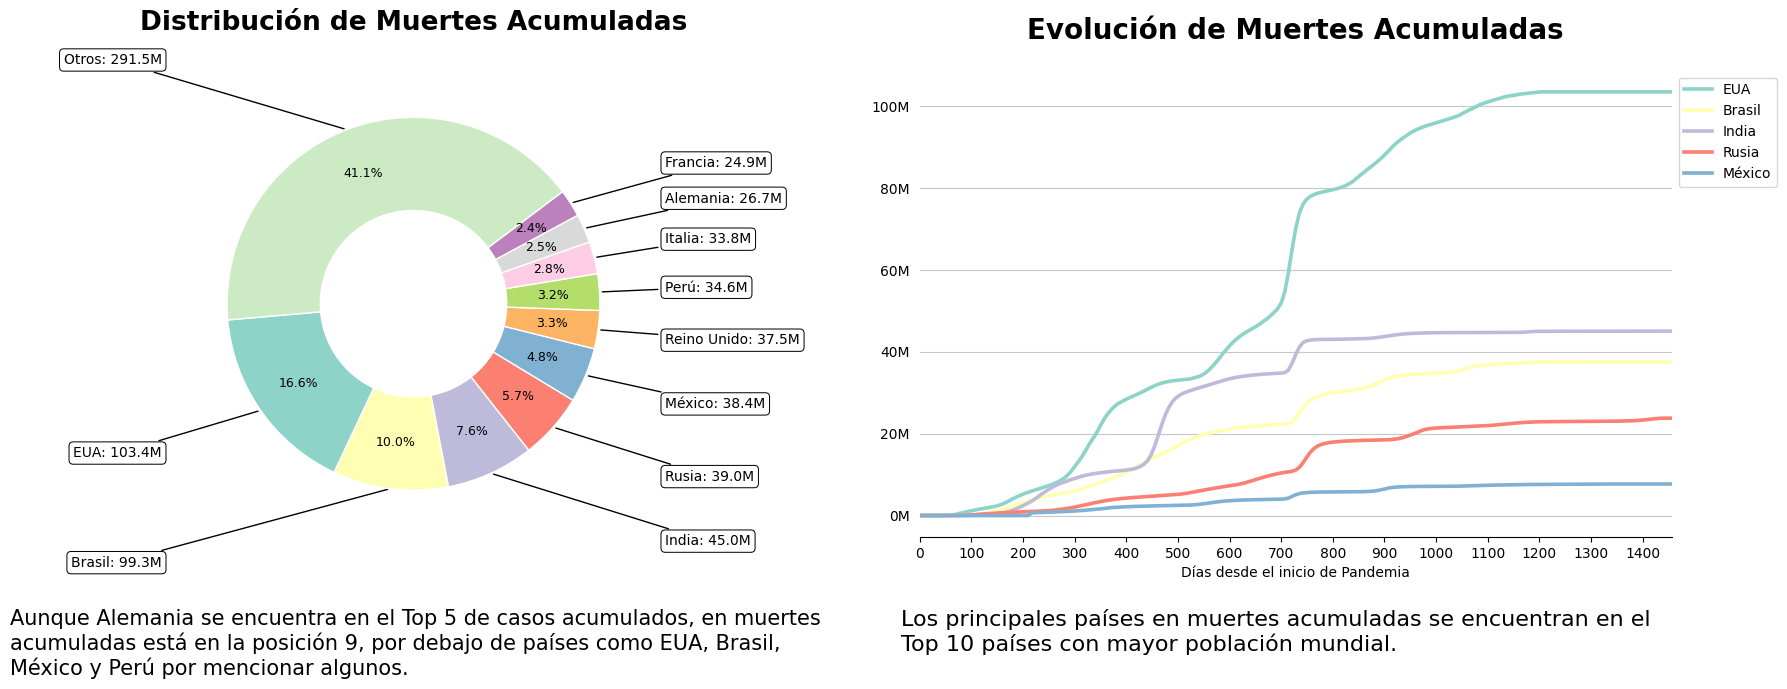

In [ ]:
#Gráfico de Donuts con Líneas de Conexión
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

#Paleta de colores
colors = plt.cm.Set3.colors[:len(top_10_paises2)]

#Gráfico de Donuts
wedges, texts, autotexts = axs[0].pie(top_10_paises2, autopct='%1.1f%%', textprops={'fontsize': 9}, pctdistance=0.75, startangle=185, wedgeprops=dict(width=0.5, edgecolor='w'), colors=colors)

#Leyenda
legend_labels = [f'Otros ({otros})'] + top_10_paises2.index.tolist()
axs[0].set_title("Distribución de Muertes Acumuladas", fontweight='bold', fontsize=19, y=1.07)

#Conexiones entre porciones y etiquetas
for i, (wedg, autotext) in enumerate(zip(wedges, autotexts)):
    ang = (wedg.theta2 - wedg.theta1) / 2. + wedg.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw = dict(arrowprops=dict(arrowstyle="-"),
              bbox=dict(boxstyle="round,pad=0.3", fc="w", ec="k", lw=0.72),
              zorder=0, va="center")
    axs[0].annotate(f"{legend_labels[i+1]}: {top_10_paises.iloc[i]/1e6:,.1f}M", xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                   horizontalalignment=horizontalalignment, **kw)

#Gráfico de Líneas
days_since_start = (total_acumulado_top_5_2.columns - total_acumulado_top_5_2.columns[0]).days
colors_tab20 = plt.cm.Set3.colors
for i,pais in enumerate(top_5_paises2.index):
    axs[1].plot(days_since_start, total_acumulado_top_5_2.loc[pais] / 1e6, label=pais, linewidth=2.6, color=colors_tab20[i])

# Personalización del gráfico de líneas
axs[1].set_xlabel("Días desde el inicio de Pandemia")
axs[1].legend(bbox_to_anchor=(1.0, 1.0), loc="upper left")
axs[1].set_title("Evolución de Muertes Acumuladas", fontweight='bold', fontsize=20, y=1.05)
axs[1].grid(axis='y', linestyle='-', alpha=0.7)
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)
axs[1].spines['left'].set_visible(False)
axs[1].yaxis.set_ticks_position('none')

# Ajustar el rango y los ticks del eje x
min_days = 0
max_days = days_since_start[-1]
axs[1].set_xlim(min_days, max_days)
axs[1].set_xticks(np.arange(min_days, max_days + 1, 100))

# Configuración del formateo de etiquetas del eje Y
axs[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}M".format(int(x))))

# Añadir texto debajo de los gráficos
fig.text(0.01, -0.14, 'Aunque Alemania se encuentra en el Top 5 de casos acumulados, en muertes \nacumuladas está en la posición 9, por debajo de países como EUA, Brasil,\nMéxico y Perú por mencionar algunos.',
         ha='left', va='bottom', fontsize=15, color='black')
fig.text(0.505, -0.1, 'Los principales países en muertes acumuladas se encuentran en el\nTop 10 países con mayor población mundial.',
         ha='left', va='bottom', fontsize=16, color='black')
plt.tight_layout()
plt.show()

##**PREGUNTA 2**

**¿Cuál ha sido la evolución de los nuevos casos diarios reportados de COVID-19 en el país (Alemania) a lo largo del tiempo?**

In [ ]:
#Nuevos casos diarios
grouped_df = df_covid_limpio.groupby(['Country', 'Date_reported'])['Cumulative_cases'].sum().unstack()
grouped_df = grouped_df.reset_index()
grouped_df = grouped_df.set_index('Country')
grouped_df = grouped_df.loc[['Alemania']]
fechas = grouped_df.columns

#new_cases = grouped_df[fechas].diff(axis=1).fillna(grouped_df[fechas]).sum(axis=0)
new_cases = grouped_df[fechas].diff(axis=1).fillna(0).sum(axis=0)
new_cases = new_cases[new_cases > 0]
new_cases

Date_reported
2020-03-08      905.0
2020-03-15     6441.0
2020-03-22    22407.0
2020-03-29    33981.0
2020-04-05    36067.0
               ...   
2023-06-04     2767.0
2023-06-11     2392.0
2023-06-18     2014.0
2023-06-25     1528.0
2023-07-02     1099.0
Length: 174, dtype: float64

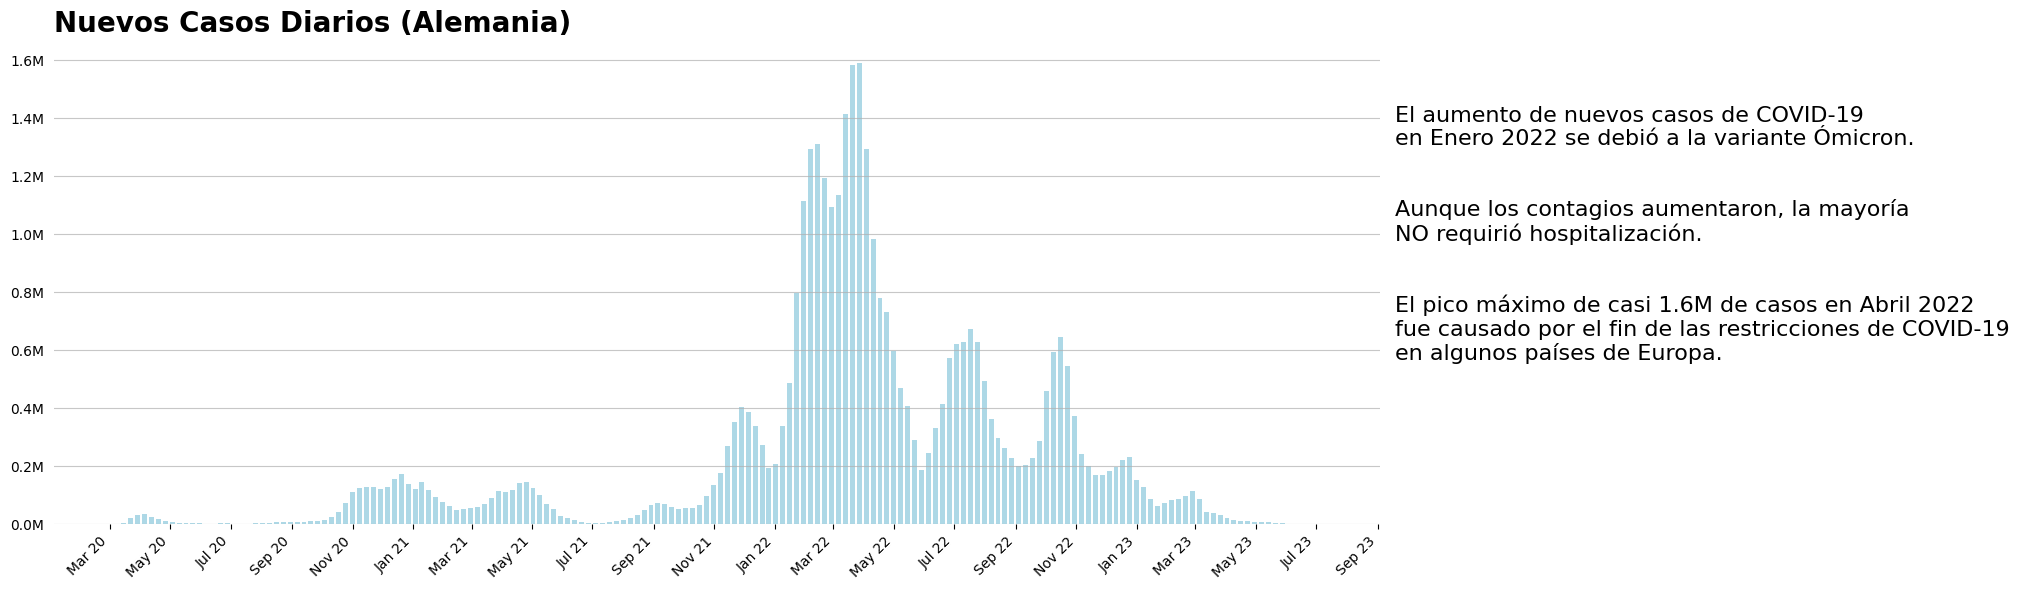

In [ ]:
#Gráfico de barras
fig, ax = plt.subplots(figsize=(14, 6))
bars = ax.bar(new_cases.index, new_cases.values/1e6, width=5, color='lightblue')

ax.set_title('Nuevos Casos Diarios (Alemania)', fontsize=20, fontweight = 'bold', loc='left')
#Configura el formato de las fechas en el eje X y las inclina a 45 grados
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))  # Cambia el formato a "Ene 21", "Feb 21", etc.
plt.xticks(rotation=45, ha='right')  # Inclina las fechas a 45 grados y alinea a la derecha

ax.grid(axis='y', linestyle='-', alpha=0.7)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_ticks_position('none')

#Configuración del formateo de etiquetas del eje Y
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}M".format(round(float(x), 2))))

#Agregar texto a la derecha del gráfico
fig.text(1, 0.6, 'El aumento de nuevos casos de COVID-19\nen Enero 2022 se debió a la variante Ómicron.\n\n\nAunque los contagios aumentaron, la mayoría\nNO requirió hospitalización.\n\n\nEl pico máximo de casi 1.6M de casos en Abril 2022\nfue causado por el fin de las restricciones de COVID-19\nen algunos países de Europa.',
         ha='left', va='center', fontsize=16)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [ ]:
# Nuevas muertes diarias en Alemania
grouped_df = df_covid_limpio.groupby(['Country', 'Date_reported'])['Cumulative_deaths'].sum().unstack()
grouped_df = grouped_df.reset_index()
grouped_df = grouped_df.set_index('Country')
grouped_df = grouped_df.loc[['Alemania']]
fechas = grouped_df.columns

#new_deaths = grouped_df[fechas].diff(axis=1).fillna(grouped_df[fechas]).sum(axis=0)
new_deaths = grouped_df[fechas].diff(axis=1).fillna(0).sum(axis=0)
new_deaths = new_deaths[new_deaths > 0]
new_deaths

Date_reported
2020-03-08      12.0
2020-03-15      84.0
2020-03-22     479.0
2020-03-29    1459.0
2020-04-05    2273.0
               ...  
2023-06-04      55.0
2023-06-11      32.0
2023-06-18      30.0
2023-06-25      15.0
2023-07-02       8.0
Length: 174, dtype: float64

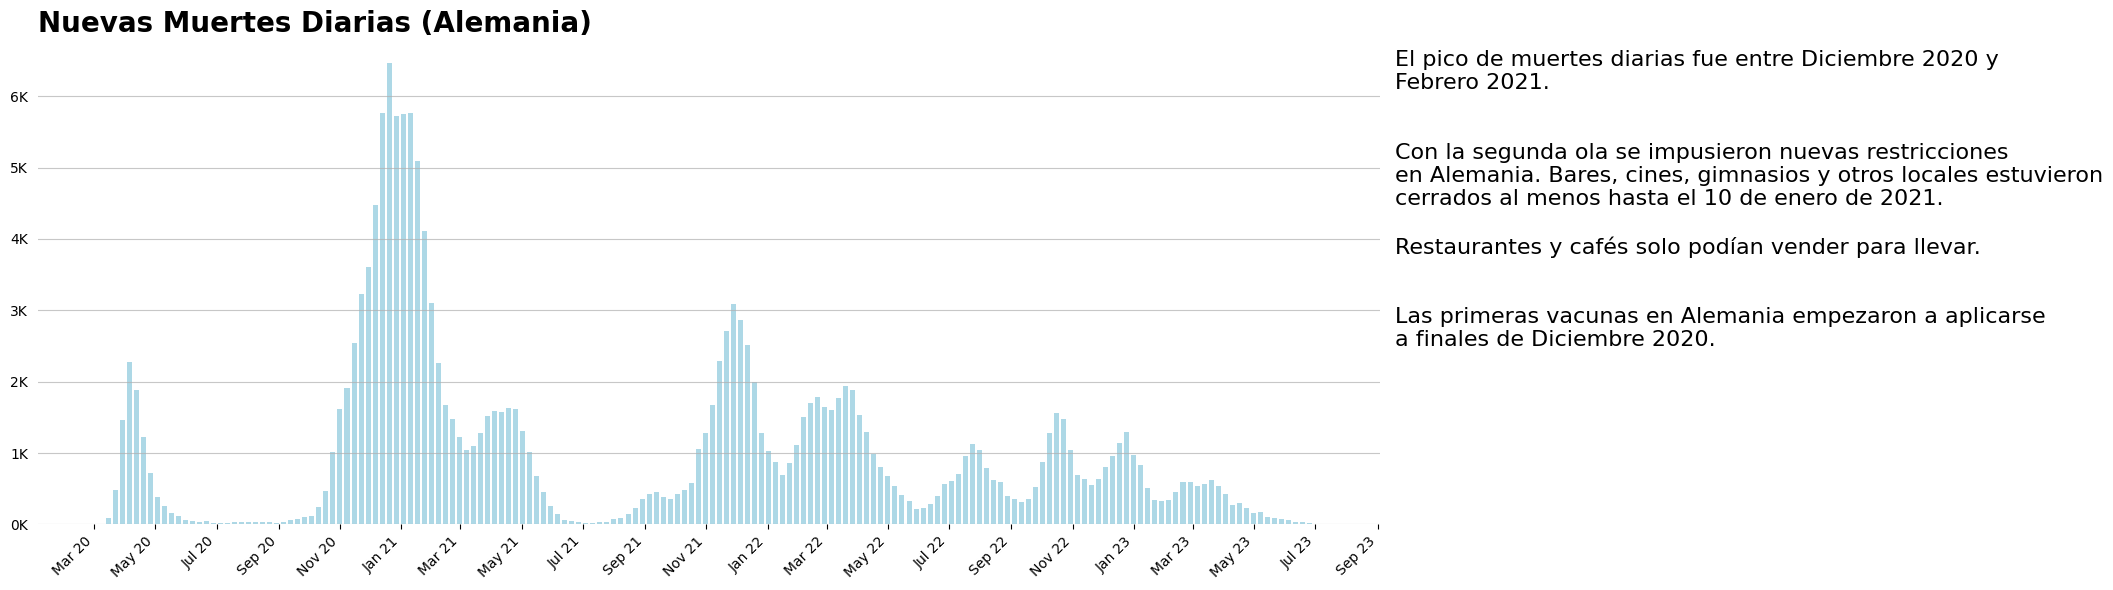

In [ ]:
#Crea el gráfico de barras
fig, ax = plt.subplots(figsize=(14, 6))
bars = ax.bar(new_deaths.index, new_deaths.values/1e3, width=5, color='lightblue')

# Título
ax.set_title('Nuevas Muertes Diarias (Alemania)', fontsize=20, fontweight = 'bold', loc='left')
#Configura el formato de las fechas en el eje X y las inclina a 45 grados
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))  # Cambia el formato a "Ene 21", "Feb 21", etc.
plt.xticks(rotation=45, ha='right')  # Inclina las fechas a 45 grados y alinea a la derecha

ax.grid(axis='y', linestyle='-', alpha=0.7)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_ticks_position('none')

#Configuración del formateo de etiquetas del eje Y
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}K".format(round(int(x), 2))))

# Agregar texto a la derecha del gráfico
fig.text(1, 0.6, 'El pico de muertes diarias fue entre Diciembre 2020 y\nFebrero 2021.\n\n\nCon la segunda ola se impusieron nuevas restricciones\nen Alemania. Bares, cines, gimnasios y otros locales estuvieron\ncerrados al menos hasta el 10 de enero de 2021.\n\nRestaurantes y cafés solo podían vender para llevar.\n\n\nLas primeras vacunas en Alemania empezaron a aplicarse\na finales de Diciembre 2020.\n\n\n',
         ha='left', va='center', fontsize=16)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

##**PREGUNTA 3**

**¿Cuál es la evolución del índice de letalidad del COVID-19 en el país (Alemania), comparado con los países con los índices históricos más elevados?**

In [ ]:
#índice de latelidad por país
def get_max_row(group, column):
    return group.loc[group[column].idxmax()]

result = df_covid_limpio.groupby(['Country', df_covid_limpio['Date_reported'].dt.to_period("M")]).apply(lambda group: get_max_row(group, 'lethality_rate'))
result.reset_index(drop=True, inplace=True)
top_4_paises = result.groupby('Country')['lethality_rate'].mean().nlargest(4).index
result = result[result['Country'].isin(top_4_paises)]
result_pais = df_covid_limpio[df_covid_limpio['Country'] == 'Alemania'].groupby(df_covid_limpio['Date_reported'].dt.to_period("M")).apply(lambda group: get_max_row(group, 'lethality_rate'))
result_pais.reset_index(drop=True, inplace=True)
result_final = pd.concat([result, result_pais])
result_final

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
6607,2020-02-23,MX,México,1,1,0,0,0.000000
6608,2020-03-29,MX,México,1214,2117,24,28,1.322626
6609,2020-04-26,MX,México,9264,22764,1453,2758,12.115621
6610,2020-08-30,MX,México,39230,654773,3731,82502,12.600092
6611,2020-09-06,MX,México,38873,693646,3556,86058,12.406617
...,...,...,...,...,...,...,...,...
42,2023-09-03,DE,Alemania,0,38437756,0,174979,0.455227
43,2023-10-01,DE,Alemania,0,38437756,0,174979,0.455227
44,2023-11-05,DE,Alemania,0,38437756,0,174979,0.455227
45,2023-12-03,DE,Alemania,0,38437756,0,174979,0.455227


In [ ]:
#Crear un diccionario de mapeo de nombres de países a cambiar
nombres_a_cambiar = {'Mexico':'México',
                     'Peru':'Perú',
                     'Sudan': 'Sudán', 'Syrian Arab Republic':'Siria'}

result_final['Country'] = result_final['Country'].replace(nombres_a_cambiar)

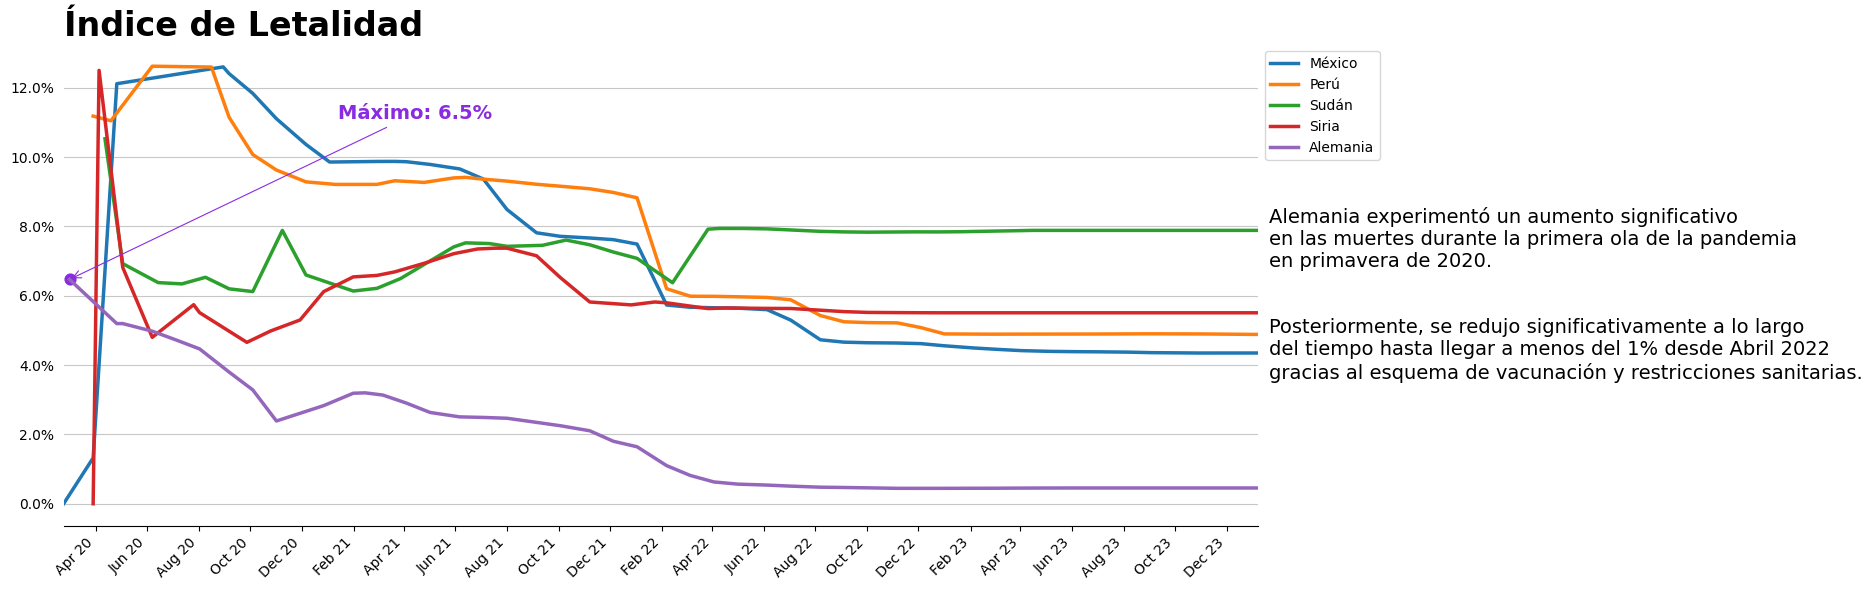

In [ ]:
#Gráfico de líneas
fig, ax = plt.subplots(figsize=(14, 6))

for pais in result_final['Country'].unique():
    country_data = result_final[result_final['Country'] == pais]
    ax.plot(country_data['Date_reported'], country_data['lethality_rate'], linewidth=2.5, label=pais)

# Agrega un marcador en el punto más alto
tu_pais_data = result_final[result_final['Country'] == 'Alemania']
max_lethality_rate = tu_pais_data['lethality_rate'].max()
max_date = tu_pais_data[tu_pais_data['lethality_rate'] == max_lethality_rate]['Date_reported'].values[0]
ax.scatter(max_date, max_lethality_rate, color='blueviolet', marker='o', s=60)

# Agrega una flecha y una línea para el texto
arrow_properties = dict(arrowstyle='->', color='blueviolet', lw=0.8)
text_properties = dict(arrowprops=arrow_properties, verticalalignment='bottom', horizontalalignment='right', fontsize=14, fontweight='bold', color='blueviolet')

# Ajusta la posición del texto
xytext_position = (max_date + pd.DateOffset(days=500), max_lethality_rate + 4.5)

ax.annotate(f'Máximo: {max_lethality_rate:.1f}%', xy=(max_date, max_lethality_rate),
            xytext=xytext_position, textcoords='data', **text_properties)

# Agrega títulos
ax.set_title('Índice de Letalidad', fontsize=24, fontweight = 'bold', loc='left')
# Configura el formato de las fechas en el eje X y las inclina a 45 grados
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Muestra cada 2 meses
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))  # Cambia el formato a "Ene 21", "Feb 21", etc.
plt.xticks(rotation=45, ha='right')  # Inclina las fechas a 45 grados y alinea a la derecha

ax.grid(axis='y', linestyle='-', alpha=0.7)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_ticks_position('none')
ax.legend(bbox_to_anchor=(1.0, 1.0), loc="upper left")

# Establece el límite del eje x hasta la última fecha disponible
last_date = result_final['Date_reported'].max()
ax.set_xlim(result_final['Date_reported'].min(), last_date)

# Configura el formato de porcentaje en el eje Y
ax.yaxis.set_major_formatter(mticker.PercentFormatter(100, symbol='%'))

# Agregar texto a la derecha del gráfico
fig.text(0.91, 0.5, 'Alemania experimentó un aumento significativo\nen las muertes durante la primera ola de la pandemia\nen primavera de 2020.\n\n\nPosteriormente, se redujo significativamente a lo largo\ndel tiempo hasta llegar a menos del 1% desde Abril 2022\ngracias al esquema de vacunación y restricciones sanitarias.',
         ha='left', va='center', fontsize=14)

plt.tight_layout()
plt.show()

##**PREGUNTA 4**

**Desde una perspectiva demográfica, ¿cuáles son las características que tienen un mayor impacto en el índice de letalidad en un país?**

In [ ]:
#Características demográficas más relevantes
df_filtrado = df_covid_limpio[df_covid_limpio['Date_reported'] <= '2020-12-31']
df_agrupado = df_filtrado.groupby(['Country_code', 'Country'], as_index=False)['lethality_rate'].mean()
df_final = pd.merge(df_agrupado, df_population_limpio, on='Country_code', how='inner')
columnas_seleccionadas = ['lethality_rate', 'Total_Population', 'Male_Population', 'Female_Population', 'Population_Density', 'Life_Expectancy']
df_final = df_final[columnas_seleccionadas]

#Usando RFR
X = df_final.drop(['lethality_rate'], axis=1)
y = df_final['lethality_rate']
model = RandomForestRegressor()
model.fit(X, y)
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importances

Life_Expectancy       0.277482
Population_Density    0.256898
Female_Population     0.175635
Male_Population       0.159480
Total_Population      0.130505
dtype: float64

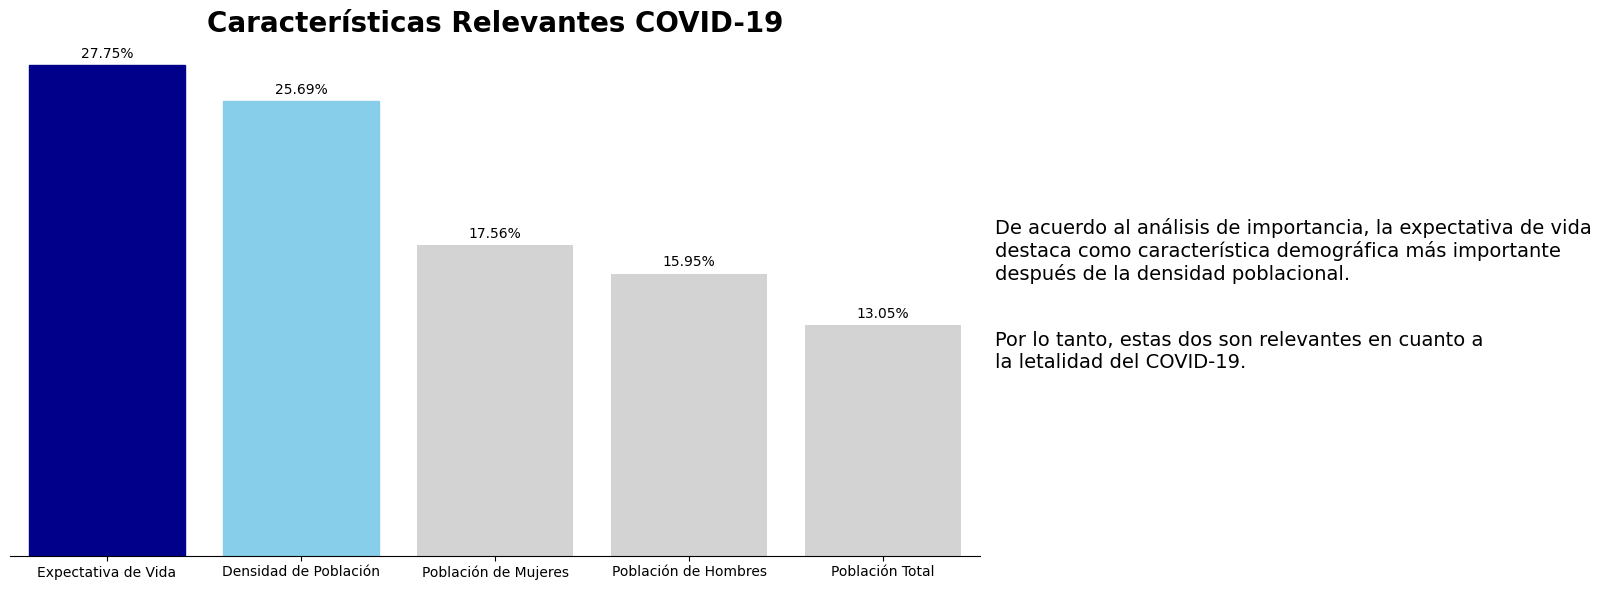

In [ ]:
#Gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
feature_importances.plot(kind='bar', ax=ax)

# Plot de barras con colores personalizados
bars = ax.bar(range(len(feature_importances)), feature_importances, color='lightgray')

# Selecciona las barras que quieres destacar
bar_indices_to_highlight = [0, 1]
colores = ['darkblue', 'skyblue']

for i, bar_index in enumerate(bar_indices_to_highlight):
    bars[bar_index].set_color(colores[i])  # Cambia el color de la barra seleccionada

ax.set_title('Características Relevantes COVID-19', fontsize=20, fontweight='bold', loc='center')
plt.xticks(range(len(feature_importances)), labels=['Expectativa de Vida', 'Densidad de Población', 'Población de Mujeres', 'Población de Hombres', 'Población Total'],
           rotation=0, ha='center')  # Añade etiquetas para las barras

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

# Oculta el eje y
ax.get_yaxis().set_visible(False)

# Configura el formato de porcentaje en el eje Y
ax.yaxis.set_major_formatter(mticker.PercentFormatter(1, symbol='%'))

# Agrega los porcentajes arriba de cada barra
for bar, percent in zip(ax.patches, feature_importances.values):
    height = bar.get_height()
    ax.annotate(f'{percent:.2%}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Ajusta la posición vertical del texto
                textcoords='offset points',
                ha='center', va='bottom', fontsize=10)
# Agregar texto a la derecha del gráfico
fig.text(1, 0.5, 'De acuerdo al análisis de importancia, la expectativa de vida\ndestaca como característica demográfica más importante\ndespués de la densidad poblacional.\n\n\nPor lo tanto, estas dos son relevantes en cuanto a\nla letalidad del COVID-19.',
         ha='left', va='center', fontsize=14)

plt.tight_layout()
plt.show()

##**PREGUNTA 5**

**¿Existe otro insight para proporcionar?**

Analicemos la expectativa de vida y la densidad poblacional de los diferentes países.

In [ ]:
#Reutilizando el códgio de la sección anterior
df_filtrado = df_covid_limpio[df_covid_limpio['Date_reported'] <= '2020-12-31']
df_agrupado = df_filtrado.groupby(['Country_code', 'Country'], as_index=False)['lethality_rate'].mean()
df_final = pd.merge(df_agrupado, df_population_limpio, on='Country_code', how='inner')
df_final
columnas_seleccionadas = ['Country', 'lethality_rate', 'Total_Population', 'Male_Population', 'Female_Population', 'Population_Density', 'Life_Expectancy']
df_final = df_final[columnas_seleccionadas]
df_final

,Country,lethality_rate,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
0,Andorra,3.745537,76343.0,38842.0,37502.0,162.432,83.004
1,United Arab Emirates,0.488321,9211657.0,6443813.0,2767844.0,129.698,79.726
2,Afghanistan,2.909761,37769499.0,19090409.0,18679089.0,58.170,63.565
3,Antigua and Barbuda,5.041373,92117.0,43961.0,48156.0,209.356,78.691
4,Anguilla,0.000000,15380.0,7551.0,7828.0,174.767,76.882
...,...,...,...,...,...,...,...
212,Yemen,0.000000,31546691.0,15953578.0,15593113.0,59.751,65.092
213,Mayotte,1.080827,294489.0,139735.0,154754.0,785.304,77.153
214,South Africa,2.297390,58087055.0,28207948.0,29879107.0,47.581,66.175
215,Zambia,2.606602,18380477.0,9066397.0,9314079.0,24.725,62.793


In [ ]:
# Ordenar por Expectativa de Vida
df_final = df_final.sort_values(by='Life_Expectancy', ascending=False)
df_final = df_final.reset_index(drop=True)
df_final

,Country,lethality_rate,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
0,Monaco,0.867992,37034.0,18145.0,18890.0,24855.034,86.542
1,Japón,2.475097,125791677.0,61158671.0,64633006.0,333.821,84.426
2,Liechtenstein,0.951729,38482.0,19102.0,19381.0,240.512,84.309
3,Switzerland,3.497429,8575588.0,4253216.0,4322373.0,214.433,83.780
4,Singapore,0.075712,5866405.0,3066573.0,2799832.0,8589.173,83.758
...,...,...,...,...,...,...,...
212,South Sudan,1.670402,10447666.0,5167140.0,5280526.0,18.519,55.912
213,Central African Republic,0.743155,5209324.0,2605852.0,2603472.0,8.362,55.025
214,Lesotho,3.122724,2225702.0,1097956.0,1127746.0,73.310,54.173
215,Chad,6.585214,16126866.0,8094822.0,8032044.0,12.807,53.259


In [ ]:
paises_interesantes = ['Alemania', 'EUA', 'China', 'India', 'México', 'Perú', 'Brasil']

# Filtrar solo las filas correspondientes a los países de interés
df_nuevo = df_final[df_final['Country'].isin(paises_interesantes)]
df_nuevo

,Country,lethality_rate,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
34,Alemania,3.810687,8.314814e+07,41023579.0,42124562.0,238.548,81.558
55,EUA,3.168450,3.343197e+08,165698830.0,168620840.0,36.547,79.138
65,China,4.639081,1.421864e+09,726781914.0,695082117.0,148.111,77.968
93,Perú,10.248065,3.282486e+07,16268182.0,16556679.0,25.643,76.156
106,Brasil,3.624265,2.117829e+08,104119798.0,107663080.0,25.339,75.338
119,México,8.473431,1.250853e+08,61187228.0,63898082.0,63.844,74.202
153,India,1.909156,1.383112e+09,714325057.0,668786993.0,465.195,70.910


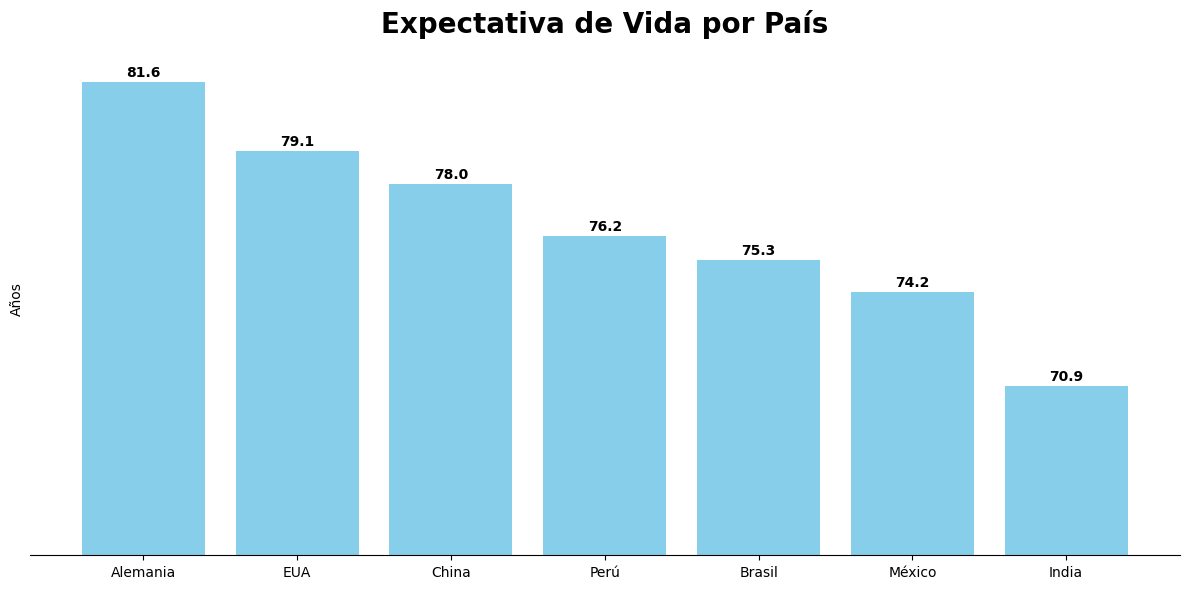

In [ ]:
# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(df_nuevo['Country'], df_nuevo['Life_Expectancy'], color='skyblue')

# Agregar los valores encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 1), ha='center', va='bottom', fontweight='bold')

plt.ylim(65,83)
plt.yticks([])

# Ocultar los bordes izquierdo y derecho
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)


# Personalizar etiquetas y título
plt.ylabel('Años')
plt.title('Expectativa de Vida por País', fontsize=20, fontweight='bold', loc='center')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Alemania ocupa el lugar 34 en Expectativa de Vida por país, dejándolo bien parado durante la pandemia respecto a otros países y considerando que fue la característica de mayor relevancia en cuanto al Índice de Letalidad.

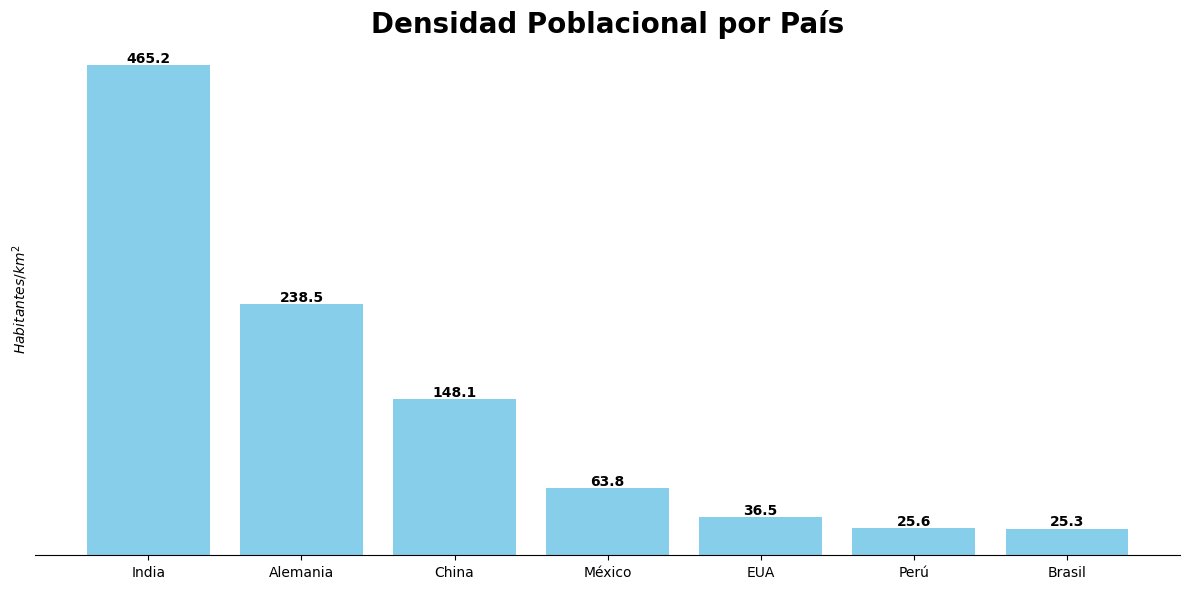

In [ ]:
# Crear el gráfico de barras
plt.figure(figsize=(12, 6))

# Ordenar el DataFrame por densidad poblacional de mayor a menor
df_nuevo = df_nuevo.sort_values(by='Population_Density', ascending=False)

bars = plt.bar(df_nuevo['Country'], df_nuevo['Population_Density'], color='skyblue')

# Agregar los valores encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 1), ha='center', va='bottom', fontweight='bold')

# Eliminar el eje Y
plt.yticks([])

# Ocultar los bordes izquierdo y derecho
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)


# Personalizar etiquetas y título
plt.ylabel('${Habitantes} / {km^2}$')
plt.title('Densidad Poblacional por País', fontsize=20, fontweight='bold', loc='center')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

En cuanto a la densidad poblacional, Alemania ocupa el lugar 55 a nivel mundiaL, lo que coincide con que sea uno de los principales países con mas casos diarios de COVID-19.

# Conclusiones

**1.- Alemania ha reportado hasta ahora un total de 38.4M casos de COVID-19, de los cuales, sólo se registran 175k muertes, lo cual equivale a un 0.45% de muertes totales respecto a los casos totales.**

**2.- El 76% de los alemanes están vacunados con al menos las primeras dosis, lo cual corresponde al importante decenso del índice de letalidad después de la aplicación de la primera dosis (23 de Diciembre del 2020).**

**3.- Podemos decir que Alemania fue uno de los países que mejor salió adelante en la pandemia.**